<a href="https://colab.research.google.com/github/Lilian-Wamuhu/Machine-Learning-Projects/blob/main/Boston_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno 

In [2]:
# Importing data
test = pd.read_csv("test.txt")
train = pd.read_csv("train.txt")
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Data Pre-Processing**

In [3]:
# Dimension of the dataset
train.shape

(1460, 81)

In [4]:
# Data distribution
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Converting the column names to lower case
train.columns = map(str.lower,train.columns)
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Checking the datatype 
train.dtypes

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 81, dtype: object

**Missing Values**

In [8]:
# Finding missing values
missing_data = train.isnull().sum().sort_values(ascending = False)
missing_data.head(20)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
lotfrontage      259
garageyrblt       81
garagecond        81
garagetype        81
garagefinish      81
garagequal        81
bsmtfintype2      38
bsmtexposure      38
bsmtqual          37
bsmtcond          37
bsmtfintype1      37
masvnrarea         8
masvnrtype         8
electrical         1
id                 0
dtype: int64

In [9]:
# Missing values percentage
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().sum().sort_values(ascending=False)/train.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945
garagetype,81,5.547945


**Categorical data**

In [10]:
#Checking the distribution of the categorical data

categorical=train.select_dtypes(include=[np.object])
categorical.head()


<ipython-input-10-ffc13f2a1bb5>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=train.select_dtypes(include=[np.object])


,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
# handling missing values
categorical.fillna('None').head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


**Numerical data**

In [12]:
for var in ['lotfrontage','garageyrblt','masvnrarea']:
    train[var]=train[var].fillna(train[var].mode()[0])


In [13]:
train.isna().sum().sort_values(ascending=False)

poolqc         1453
miscfeature    1406
alley          1369
fence          1179
fireplacequ     690
               ... 
masvnrarea        0
exterior2nd       0
exterior1st       0
roofmatl          0
saleprice         0
Length: 81, dtype: int64

**Feature colleration**

In [14]:
# Finding out the correlation between the features
corr = train.corr()
corr.shape


<ipython-input-14-b7d2729bce61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


(38, 38)

<ipython-input-15-f0b66d8461b6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = price.corr()


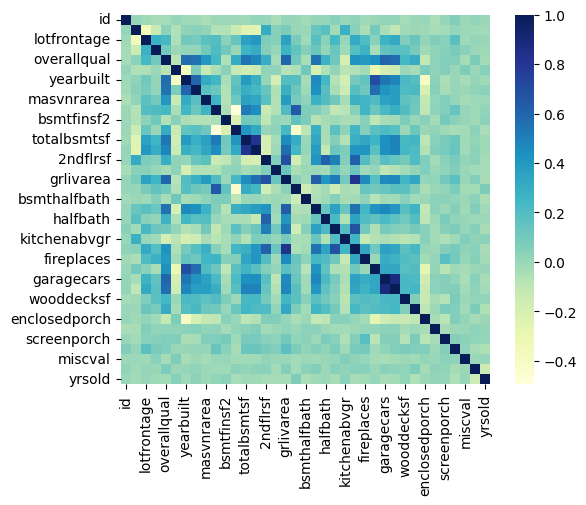

In [15]:
# Plotting price correlation
price = train.drop('saleprice', axis=1)
#creating a correlation matrix
correlations = price.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


#price = train.drop('saleprice', axis=1)
#corr = price.corr()
#sns.heatmap(corr,cmap = "YlGnBu")

**Hot Encoding**

In [16]:
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [17]:
CatVariables = train.select_dtypes(include=['object'])
for feature in CatVariables:
    train[feature] = le.fit_transform(train[feature].astype(str))


**Detecting Outliers**

In [18]:
from sklearn.ensemble import IsolationForest 
outliers = IsolationForest(contamination=0.05).fit_predict(train)
print('Rows with outliers: ', np.where(outliers))


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Rows with outliers:  (array([   0,    1,    2, ..., 1457, 1458, 1459]),)


In [19]:
train = train.drop(np.where(outliers<1)[0])
train.shape


(1387, 81)

**Data train and split**

In [20]:
# Spliting target variable and independent variables
X = train.drop(columns=['id','saleprice'])
y = train['saleprice']

In [21]:
print(len(X), len(y))


1387 1387


In [22]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
X_train, x_test, y_train, y_test =train_test_split(X,y, test_size = 0.33, random_state =5)


**1. Linear Regression**

**a. Model training**

In [23]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
# Train the model using the training sets 
model = lm.fit(X_train,y_train)


**b. Model evaluation**

In [24]:
# Model prediction on train data
pred_y = lm.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
1031,197000,228635.399423
1430,192140,174441.046244
827,189000,196198.595700
729,103000,73382.682994
35,309000,300599.456928


In [25]:
# Model Evaluation
import sklearn
from sklearn.metrics import r2_score
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
r2_score = mse = r2_score(y_test, pred_y)
print("mse is:", mse)
print("r2_score is:",r2_score )


mse is: 0.8935120252457683
r2_score is: 0.8935120252457683


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 


In [26]:
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge
pipe = make_pipeline(PolynomialFeatures(degree=1),Ridge(alpha=100))
scores = cross_val_score(pipe, X, y, cv=3, scoring='neg_root_mean_squared_error')

print(scores, scores.mean())

[-23458.70315251 -25088.47471865 -22710.46259987] -23752.54682367229


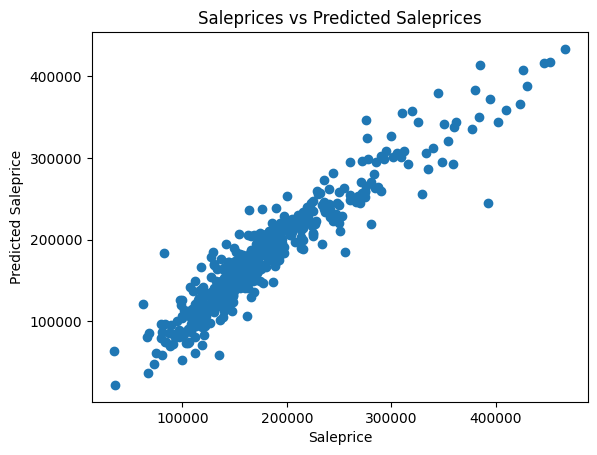

In [27]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,pred_y)
plt.xlabel('Saleprice')
plt.ylabel('Predicted Saleprice')
plt.title("Saleprices vs Predicted Saleprices")
plt.show()

**Test Data**

In [28]:
# Predicting Test data with the model
y_test_pred = lm.predict(x_test)

In [29]:
# Model Evaluation
import sklearn
from sklearn.metrics import r2_score
mse = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
r2_score = mse = r2_score(y_test, y_test_pred)
print("mse is:", mse)
print("r2_score is:",r2_score )


mse is: 0.8935120252457683
r2_score is: 0.8935120252457683


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.
Hence Linear Regression works best for this dataset
